# Part I: Research Question
## A1: Question
What customer qualities or factors from the data can be used to predict the churn of customers?

## A2: Objective and Goals
The objective of an analysis of the data is to determine what features, if any, can significantly predict whether or not the customer will continue services with the organization.


# Part II: Method Justification

## B1: Summary of Assumptions

### Assumption #1: Independence of Observations 
In logistic regression, the normal distribution of the observational errors is not assumed, however, the independence of the observations themselves are still assumed. In simple terms, the values of each variable must not have an effect on the other values within the same variable. If errors become correlated or there are duplicate observations in our dataset the standard error cannot be relied upon. The independence of the observation is a scientific method issue and not a statistical one, but it should be validated in the dataset.  

### Assumption #2: Linearity in the Logit for Continous Independent Variables
Unlike in multiple linear regression, logistic regression does not require the independent variable to be linearly related to the dependent variable. It does, however, assume linearity in the logit for any continuous independent variables. This means that there should be a linear relationship between each independent variable and the log odds of the dependent variable. 

### Assumption #3: Absence of Muliticollinearity Among Independent Variables
Multicollinearity in the model occurs when two or more independent variables share the same correlation with the target variable. This usually means that the independent variables are related and explain the same variance with the target variable. A logistic regression model with highly correlated independent variables will usually result in large standard errors for the estimated beta coefﬁcients (or slopes) of these variables. (Stoltzfus, 2011)

### Assumption #4: No Heavily Influential Outliers
Outliers are any abnormal or unusual data values when compared to other date values within an independent variable. Normally, an outlier can be confirmed if it is three or more standard deviations away from a statistic, but this can be subjective depending on the data. Outliers in the dataset can create inaccuracies within the model and should either be removed, changed, or left untouched with model notation, depending on desired results.

## B2: Benefits of Using Python

By using Python, data can be easily cleaned, explored, and prepared for use in predictive model building. The models themselves can be created using Python. Plots, charts, and graphs can be created to visualize the data and better understand relationships within datasets. This creates opportunities to provide detailed visual information for presentations. Python contains many packages built by data scientists that help with the previously mentioned tasks. Some packages that will be used are Numpy, Pandas, Matplotlib, Seaborn, Statsmodels, and Sklearn.

## B3: Why Logistic Regression?

Since our dependent variable "Churn" is a dichotomous variable, it is appropriate to use the logistic regression model to achieve answering the question. The dataset contains many other continuous and categorical variables that can be used to build the logistic regression model. The difference between the multiple linear regression model and the logistic regression model is that instead of trying to predict the variables' outcome, the linear regression model predicts the *probability* of the outcome of the variable. 

# Part III: Data Preparation

## C1: Data Preparation Goals and Manipulation

The overall goal of data preparation is to ensure that the data that will be used for the logistic regression model is complete, accurate, and efficiently used. If the data used to create and input into the model are garbage, garbage will be returned from the model. Some data manipulation tasks that need to be completed for data preparation to conduct logistic regression are:

- Import the dataset
- Identify and handle missing data
- Identify and handle outliers or strange values
- Transform categorical variables in numerical values and drop a selection for each categorical variable
- Ensure the target variable is categorical

## C2: Summary Statistics

The below statistical factors of the models will be needed to help answer the research question and were derived from the course textbook:

- Coefficients of all predictor variables - the coefficients of each independent variable will need to be determined to build the logistic regression model.

- Log-Likelihood - Effective for comparing models of the same data. A model with a log-likelihood closer to zero is a better candidate for fit. 

- p-values - these indicate the probability of observing the test statistic assuming the null hypothesis that the population coefficient is zero. Normally, p-values less than 0.5 indicate that the null hypothesis can be rejected and the statistic can be used in the model.

- Pseudo R-squared statistic: The Pseudo R-squared statistic is an analogy to linear regressions R-squared but does not measure the proportion of variation in the dependent variable explained by the model. It is instead computed based on the ratio of the maximized log-likelihood function for the null model and the full model. Computed to be between 0 and 1, values closer to 1 indicate a better fitting model.

- Variance inflation factor(VIF) - provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of collinearity.

<b>Independent Variables</b>
- Population              (Continuous)

- Area                    (Categorical)

- Children                (Continuous)
- Age                     (Continuous)

- Income                  (Continuous)

- Marital                 (Categorical)

- Gender                  (Categorical)

- State                   (Categorical)

- Outage_sec_perweek      (Continuous)

- Email                   (Continuous)

- Contract                (Categorical)

- Contacts                (Continuous)

- Yearly_equip_failure    (Continuous)

- Techie                  (Categorical)

- Tenure                  (Continuous)

- Port_modem              (Categorical)

- Tablet                  (Categorical)

- InternetService         (Categorical)

- Phone                   (Categorical)

- Multiple                (Categorical)

- OnlineSecurity          (Categorical)

- OnlineBackup            (Categorical)

- DeviceProtection        (Categorical)

- TechSupport             (Categorical)

- StreamingTV             (Categorical)

- StreamingMovies         (Categorical)

- PaperlessBilling        (Categorical)

- PaymentMethod           (Categorical)

- Tenure                  (Categorical)

- MonthlyCharge           (Continuous)

- Bandwidth_GB_Year       (Continuous)

- Item1                   (Categorical)

- Item2                   (Categorical)

- Item3                   (Categorical)

- Item4                   (Categorical)

- Item5                   (Categorical)

- Item6                   (Categorical)

- Item7                   (Categorical)

- Item8                   (Categorical)

<b>Target Variable</b>

- Churn                (Categorical)

## C3: Steps to Prepare the Data for Analysis 

In [1]:
#Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


%matplotlib inline

### 1) Import the Original Dataset

In [2]:
#Load the dataset
churn_clean = pd.read_csv("C:/Users/holtb/Data/WGU Datasets/churn_clean.csv")

In [3]:
len(churn_clean.columns)

50

### 2) Drop Unused Variables and Convert Catergorical Variables

In [4]:
#Drop unused variables
churn_model_data = churn_clean.drop(['CaseOrder','Customer_id','Interaction','UID','City','County','Lat','Lng',
                  'TimeZone','Job','Zip'], axis=1)

In [5]:
len(churn_model_data.columns)

39

In [6]:
#Converting Item# variables to categorical variables
churn_model_data[['Item1','Item2','Item3',
                  'Item4','Item5','Item6',
                  'Item7','Item8']] = churn_model_data[['Item1','Item2','Item3',
                                                        'Item4','Item5','Item6',
                                                        'Item7','Item8']].astype('category')

### 3) Identify Missing Data

In [7]:
display(churn_model_data.isnull().any())

State                   False
Population              False
Area                    False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProtection        False
TechSupport             False
StreamingTV             False
StreamingMovies         False
PaperlessBilling        False
PaymentMethod           False
Tenure                  False
MonthlyCharge           False
Bandwidth_GB_Year       False
Item1                   False
Item2                   False
Item3     

### 4) Identify and Handle Outliers 

In [8]:
#Dropping categorical variables 
churn_continuous_data = churn_model_data.drop(['Area','Marital','Gender','Churn', 'Techie','Contract', 'Port_modem', 
                                          'Tablet', 'InternetService', 'Phone', 'Multiple','OnlineSecurity', 'OnlineBackup',
                                          'DeviceProtection','TechSupport','TechSupport', 'StreamingTV', 'StreamingMovies',
                                          'PaperlessBilling','PaymentMethod','Item1','Item2','Item3','Item4','Item5','Item6',
                                          'Item7','Item8'], axis=1)

In [9]:
churn_continuous_data.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [10]:
len(churn_continuous_data.columns)

12

### 5)Transform Categorical Data

In [11]:
churn_categorical_data = churn_model_data.drop(['Area','Marital','Gender','Churn', 'Techie','Contract', 'Port_modem', 
                                          'Tablet', 'InternetService', 'Phone', 'Multiple','OnlineSecurity', 'OnlineBackup',
                                          'DeviceProtection','TechSupport','TechSupport', 'StreamingTV', 'StreamingMovies',
                                          'PaperlessBilling','Item1','Item2','Item3','Item4','Item5','Item6','Item7',
                                          'Item8'], axis =1)

churn_categorical_data.head()

,State,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,AK,38,0,68,28561.99,7.978323,10,0,1,Credit Card (automatic),6.795513,172.455519,904.536110
1,MI,10446,1,27,21704.77,11.699080,12,0,1,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,OR,3735,4,50,9609.57,10.752800,9,0,1,Credit Card (automatic),15.754144,159.947583,2054.706961
3,CA,13863,1,48,18925.23,14.913540,15,2,0,Mailed Check,17.087227,119.956840,2164.579412
4,TX,11352,0,83,40074.19,8.147417,16,2,1,Mailed Check,1.670972,149.948316,271.493436


In [12]:
#Transform categorical variables to numeric using dummy variables
churn_model_transdata = pd.get_dummies(churn_model_data, columns = ['State','Area','Marital','Gender','Churn','PaymentMethod',
                                                                    'Techie','Contract','Port_modem', 'Tablet', 
                                                                    'InternetService','Phone','Multiple','OnlineSecurity', 
                                                                    'OnlineBackup','DeviceProtection','TechSupport',
                                                                    'StreamingTV', 'StreamingMovies', 
                                                                    'PaperlessBilling','Item1','Item2','Item3','Item4',
                                                                    'Item5','Item6','Item7','Item8'])

In [13]:
#Show current columns
for col in churn_model_transdata.columns:
    print(col)

Population
Children
Age
Income
Outage_sec_perweek
Email
Contacts
Yearly_equip_failure
Tenure
MonthlyCharge
Bandwidth_GB_Year
State_AK
State_AL
State_AR
State_AZ
State_CA
State_CO
State_CT
State_DC
State_DE
State_FL
State_GA
State_HI
State_IA
State_ID
State_IL
State_IN
State_KS
State_KY
State_LA
State_MA
State_MD
State_ME
State_MI
State_MN
State_MO
State_MS
State_MT
State_NC
State_ND
State_NE
State_NH
State_NJ
State_NM
State_NV
State_NY
State_OH
State_OK
State_OR
State_PA
State_PR
State_RI
State_SC
State_SD
State_TN
State_TX
State_UT
State_VA
State_VT
State_WA
State_WI
State_WV
State_WY
Area_Rural
Area_Suburban
Area_Urban
Marital_Divorced
Marital_Married
Marital_Never Married
Marital_Separated
Marital_Widowed
Gender_Female
Gender_Male
Gender_Nonbinary
Churn_No
Churn_Yes
PaymentMethod_Bank Transfer(automatic)
PaymentMethod_Credit Card (automatic)
PaymentMethod_Electronic Check
PaymentMethod_Mailed Check
Techie_No
Techie_Yes
Contract_Month-to-month
Contract_One year
Contract_Two Year
Port

In [14]:
#Dropping one column per catergorical variable to meet n-1 requirements
churn_LRM_data = churn_model_transdata.drop(['State_AK','Area_Rural','Marital_Widowed','Gender_Nonbinary','Techie_No',
                                            'Contract_Two Year','Port_modem_No','Tablet_No','InternetService_None',
                                            'Phone_No','Multiple_No','OnlineSecurity_No','DeviceProtection_No','TechSupport_No',
                                            'StreamingTV_No', 'StreamingMovies_No','PaperlessBilling_No','Item1_1','Item2_1',
                                            'Item3_1','Item4_1','Item5_1','Item6_1','Item7_1','Item8_1',
                                             'PaymentMethod_Bank Transfer(automatic)','Churn_No','OnlineBackup_No'], axis = 1)

## C4: Univariate and Bivariate Visualizations

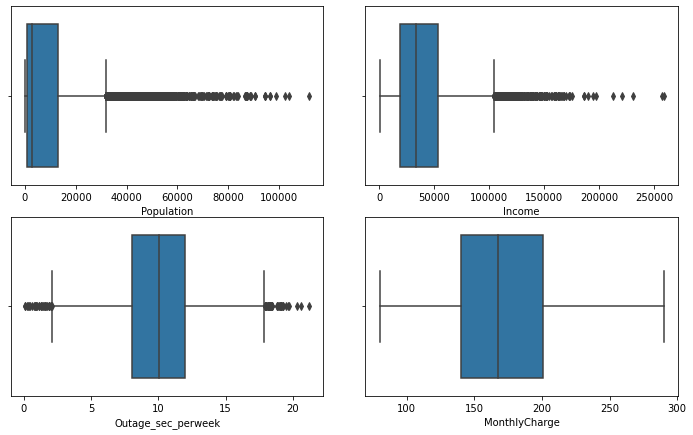

In [16]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
plt.tight_layout()

sns.boxplot(x ="Population",
            data = churn_continuous_data,
            ax = axs[0,0])
sns.boxplot(x="Income",
            data = churn_continuous_data,
            ax = axs[0,1])

sns.boxplot(x="Outage_sec_perweek",
            data = churn_continuous_data,
            ax = axs[1,0])

sns.boxplot(x="MonthlyCharge",
            data = churn_continuous_data,
            ax = axs[1,1]);

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,6))
plt.tight_layout()

sns.regplot(x='Tenure', 
            y='Churn_Yes', 
            data=churn_LRM_data, 
            logistic=True,
            ax = axs[0] )

sns.regplot(x='MonthlyCharge',
            y='Churn_Yes', 
            data=churn_LRM_data,
            logistic=True,
            ax = axs[1]);

## C5: Copy of Prepared Dataset

In [ ]:
churn_LRM_data.to_csv('C:/Users/holtb/Data/D208/Task 2/churn_LRM_data.csv')

# Part IV: Model Comparison And Analysis

## Initial Model:

In [ ]:
X = churn_LRM_data.drop(['Churn_Yes'], axis=1)
y = churn_LRM_data['Churn_Yes'] 

In [ ]:
#define the input
X2 = sm.add_constant(X)

#create an Logistic Regression Model
initial_model = sm.Logit(y.astype("float64"), X2.astype("float64"))

#fit the data
initial_est = initial_model.fit()

#Summarize the output
initial_est.summary()

### Multicollinearity
The initial model had significant issues due to the multicollinearity between independent variables within the model. By calculating the variance inflation factors(VIF), variables with multicollinearity can be identified. Any variables calculated above 10 were removed one at a time and the VIFs were recalculated until all VIFs were below 10.

In [ ]:
# creating the data frames before and after removing variables that are creating multicollinearity
churn_data_before = churn_LRM_data.drop(['Churn_Yes'], axis=1)

# adding a constant to the data frames as required for the VIF calculation
A1 = sm.tools.add_constant(churn_data_before)

# create the series 
series_before = pd.Series([variance_inflation_factor(A1.values, i) for i in range(A1.shape[1])], index=A1.columns)

# display the series
print('-'*100)
print('Data Before Removing Target and Redundant Variables')
print('-'*100)
pd.options.display.max_rows = 145
pd.set_option('display.float_format', '{:.2f}'.format)
display(series_before)

In [ ]:
# creating the data frames before and after removing variables that are creating multicollinearity
churn_data_after = churn_LRM_data.drop(['Churn_Yes','Bandwidth_GB_Year','Gender_Female','Item1_3','Item2_4','Item5_4',
                                        'Item8_4','Item6_3','Item3_3','Item4_3','Item7_3','MonthlyCharge'], axis=1)

# adding a constant to the data frames as required for the VIF calculation
A2 = sm.tools.add_constant(churn_data_after)

# create the series 
series_after = pd.Series([variance_inflation_factor(A2.values, i) for i in range(A2.shape[1])], index=A2.columns)

# display the series
print('-'*100)
print('Data After Removing Target and Redundant Variables')
print('-'*100)
pd.options.display.max_rows = 145
pd.set_option('display.float_format', '{:.2f}'.format)
display(series_after)

In [ ]:
#Dropped target variable and indpendent variables causing multicollinarity issues
X_next = churn_LRM_data.drop(['Churn_Yes','Bandwidth_GB_Year','Gender_Female','Item1_3','Item2_4','Item5_4','Item8_4',
                          'Item6_3','Item3_3','Item4_3','Item7_3','MonthlyCharge'], axis=1)

y = churn_LRM_data['Churn_Yes'] 

In [ ]:
#define the input
X_next = sm.add_constant(X_next)

#create an Logistic Regression Model
next_model = sm.Logit(y.astype("float64"), X_next.astype("float64"))

#fit the data
next_est = next_model.fit()

#Summarize the output
next_est.summary()

### P-Values > .05

Next, all variables with non-significant p-values were removed from the model. Starting with the highest p-value and using a p-value of .05 as the alpha, each variable was removed one at a time (backwards stepwise) and the model reran until all p-values were of significant value. 

In [ ]:
X_next2 = churn_LRM_data.drop(['Churn_Yes','Bandwidth_GB_Year','Gender_Female','Item1_3','Item2_4','Item5_4','Item8_4',
                           'Item6_3','Item3_3','Item4_3','Item7_3','MonthlyCharge','Item8_8','State_VA', 'Item6_8',
                           'Item3_8','Item7_5','Item8_2','Item2_2','State_AZ','State_ME','State_ND','State_UT','State_CO',
                           'State_HI','State_CT','Item5_3','Item1_4','Item1_5','Item1_7','Item7_6','Item4_5','Item2_6',
                           'Item5_6','Item5_5','Population','Outage_sec_perweek','Income','State_ID','State_KY','State_IN',
                           'State_LA','State_MD','State_PR','Item1_6','Item8_7','Item6_7','Item3_5','Item2_5','State_AL',
                           'State_MI','State_MS','State_NJ','State_IA','State_MN','State_KS','State_NC','State_SC',
                           'State_WI','State_NE','State_WY','State_GA','Item4_4','Item8_5','Item6_5','Item3_7','Item8_6',
                           'Item8_3','Item8_3','Item2_7','Item6_6','Item7_2','Item3_2','Tablet_Yes','Contract_One year',
                           'State_CA','State_IL','State_NH','Area_Suburban','Yearly_equip_failure','Age','State_MA',
                           'State_MO','State_OK','State_OH','State_TX','Marital_Separated','State_PA','State_NV',
                           'Area_Urban','State_NV','State_DE','State_WA','State_PA','State_DC','Children','Email','Contacts',
                           'State_VT','State_AR','State_FL','State_MT','Marital_Married',
                           'PaymentMethod_Credit Card (automatic)','InternetService_Fiber Optic','Item7_7','Item5_2',
                           'Item3_4','Item2_3','Item6_4','Item6_2','Item4_7','Item4_6','Item1_2','Item4_2',
                           'OnlineSecurity_Yes','Port_modem_Yes','PaymentMethod_Mailed Check','Marital_Never Married',
                           'Marital_Divorced','State_OR','State_SD','State_NM','State_NY','PaperlessBilling_Yes',
                           'Item3_6','State_TN','State_RI','State_WV','Phone_Yes','Item5_7'], axis=1)

y = churn_LRM_data['Churn_Yes'] 

#define the input
X_next2 = sm.add_constant(X_next2)

# Split X and y into X_
X_train, X_test, Y_train, Y_test = train_test_split(X_next2, y, test_size=0.33, random_state=1)

In [ ]:
#create an Logistic Regression Model
next2_model = sm.Logit(Y_train.astype("float64"), X_train.astype("float64"))

#fit the data
next2_est = next2_model.fit()

#Summarize the output
next2_est.summary()

### Reduced Model
With mulitcollinearity issues and insignificant variables removed the final model is created:

In [ ]:
X_final = X_next2
y = churn_LRM_data['Churn_Yes'] 

#define the input
X_final = sm.add_constant(X_next2)

# Split X and y into X_
X_train, X_test, Y_train, Y_test = train_test_split(X_final, y, test_size=0.33, random_state=1)

In [ ]:
#create an Logistic Regression Model
final_model = sm.Logit(Y_train.astype("float64"), X_train.astype("float64"))

#fit the data
final_est = final_model.fit()

#Summarize the output
final_est.summary()

### Part E: Analyze the Dataset Using the Reduced Logistic Regression Model

E1: The logic of the variable selection technique was explained in part IV as the variables were removed. The backwards stepwise method was used. Although not the best method to use according to Stoltzfus, it was chosen because of the requirement to have an intial model with all variables listed in part C2. In general, variables were removed to meet logistic model assumptions and ensure the variables were not overfitted by using only significant variables in the model. 

E2: The following model evaluation metrics are used to compare the initial and reduced model:

- Converged: The initial model did not converge where as the reduced model did. This suggest that the reduced model is superior.

- Log-Likelihood: While still significantly well away from 0 in the reduced model, the log-likeihood is much closer to zero than in the initial model, indicating a better fit.

- Psuedo R-squared: The psuedo R-squared of the reduced model is slightly lower than the initial model, however, when combined with the other comparing factors above, the reducted value is insignificant. 

- Model Accuracy Score: Both model's accuracy scores were similar, with a only slightly higher score of the initial model. 

- Precision and Recall: Precision is the ability of a model not to label an instance positive that is actually negative, whereas Recall is the ability of a model to find all positive instances. Again, both models precision and recall scores were very similar.

- F1 Score: The F1 score is a weighted harmonic mean of precision and recall with 1.0 being the best and 0.0 being the worst. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy. (Muthukrishnan, 2018) The inital model's F1 score is slightly high than the reduced model. However, other important previously mentioned factors need to be accounted for as well. 

- Confusion Matrix: Both model's confusion matrixs were again relatively the same showing a high degree of prediction accuracy.

#### Initial Model Evaluation

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
pipe.fit(X2, y)

In [ ]:
initial_predictions = pipe.predict(X2)

In [ ]:
pipe.score(X2, y)

In [ ]:
print(classification_report(y, initial_predictions))

In [ ]:
print(confusion_matrix(y, initial_predictions))

In [ ]:
plt.matshow(confusion_matrix(y, initial_predictions))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Reduced Model Evaluation

In [ ]:
pipe.fit(X_train, Y_train) 
pipe.score(X_train, Y_train)

In [ ]:
pipe.fit(X_test, Y_test)
pipe.score(X_test, Y_test)

In [ ]:
predictions = pipe.predict(X_test)

In [ ]:
print(classification_report(Y_test, predictions))

In [ ]:
print(confusion_matrix(Y_test, predictions))

In [ ]:
plt.matshow(confusion_matrix(Y_test, predictions))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Part V: Data Summary and Implications

### F1: Results of the Data Analysis

<b>Logistic Regression equation:</b>

$p = \frac{e^{-0.1118x_{1} + 0.2758x_{2} + 0.4425x_{3} + 1.0323x_{4} + 3.3991x_{5}+ 1.3765x_{6}+ 1.6914x_{7}+ 0.9048x_{8}+ 0.4886x_{9}+ 0.1980x_{10}+ 2.9585x_{11}+ 3.5135x_{12} - 0.1711x_{13} - 6.7039}}{1 + e^{-0.1118x_{1} + 0.2758x_{2} + 0.4425x_{3} + 1.0323x_{4} + 3.3991x_{5}+ 1.3765x_{6}+ 1.6914x_{7}+ 0.9048x_{8}+ 0.4886x_{9}+ 0.1980x_{10}+ 2.9585x_{11}+ 3.5135x_{12} - 0.1711x_{13} - 6.7039}}$

where

<b>Interpretation of coefficients that were statistically significant:</b>

$x_{1}=$ Tenure - As the only continuous variable in the model, this coefficient reduces the log(odds) that the customer will churn by -0.1118 for each month the customer remains a customer. For example, a customer with a tenure of 12 months will have a reduced log(odds) of churning -0.1118 * 12 = -1.3416  whereas a customer with 24 months tenure will have a reduced log(odds) of churning by -2.6832. This suggests that the longer a customer stays a customer, the probability of that customer churning decreases.

$x_{2}=$ Gender_Male - Male customers log(odds) of churning are increased by 0.2758.

$x_{3}=$ PaymentMethod_Electronic Check - Customers who use electronic check as a payment method log(odds) of churning are increased by 0.4425.

$x_{4}=$ Techie_Yes - Customer's who consider themselves "Techies" increase the log(odds) of churning by 1.0323.

$x_{5}=$ Contract_Month-to-month - Customers who are on month-to-month service contracts have an increased log(odds) of churning by 3.3991. 

$x_{6}=$ InternetService_DSL - Customers with DSL service have an increased log(odds) of churning of 1.3765.

$x_{7}=$ Multiple_Yes - Customers with multiple phone lines have an increased log(odds) of churning of 1.6914.

$x_{8}=$ OnlineBackup_Yes - Customers with OnlineBackup service add-on have an increased log(odds) of churning of 0.9048.

$x_{9}=$ DeviceProtection_Yes - Customers with DeviceProtection service add-on have an increased log(odds) of churning of 0.4886

$x_{10}=$ TechSupport_Yes - Customers with TechSupport service add-on have an increased log(odds) of churning of 0.1980

$x_{11}=$ StreamingTV_Yes - Customers with StreamingTV service add-on have an increased log(odds) of churning of 2.9585.

$x_{12}=$ StreamingMovies_Yes - Customers with StreamingMovies service add-on have an increased log(odds) of churning of 3.5135.

$x_{13}=$ Item7_4 - Customers answering 4 on item 7 in the eight-question survey have a log(odds) increase of churning of .1711. (Not very useful)

Constant - The line of the log(odds) linear model crosses y at - 6.7039. 

<b>The statistical and practical significance of the model:</b>

 By reviewing the classification report it can be determined the model is statistically significant. The model is overall highly accurate with an approximate 90% accuracy rating and an F1 score of approximately 90%. As this is a model evaluating customers of a business, I believe an inaccuracy of 10% is acceptable.
 
 This model is useful in a practical significance as well. The business can look at the variables that significantly increase or reduce the log(odds) of a customer churning. For example, the longer the tenure of a customer the lower the probability that the customer will churn. The organization can develop a model that predicts the customers' tenure to determine factors that increase or decrease the tenure of a customer. Another example is to look at the streaming services of the organization. The model suggests that customers with these services significantly increases the probability of churn. The business can look into the effectiveness of these services, attempt to determine why customers with these services have an increased likelihood of churn or evaluate whether or not the business should continue offering these services. 

<b>Limitations of the data analysis:</b>

Due to the way the model was built (backward stepwise) the model may be missing crucial variables (such as MonthlyCharge). Because the model included all the variables at once, it is difficult to determine which variables were causing multicollinearity issues. Creating the model with one variable at first, then adding more as it was created, may be a better way of determining which variables cause multicollinearity issues. Building the model this way could also allow variables that were initially shown to have significant relationships to remain in the model.  

### F1: Recommended Course of Action

As stated above, the business can look at the variables that significantly increase or reduce the log(odds) of a customer churning. For example, the longer the tenure of a customer the lower the probability that the customer will churn. The organization can develop a model that predicts the customers' tenure to determine factors that increase or decrease the tenure of a customer. Another example is to look at the streaming services of the organization. The model suggests that customers with these services significantly increases the probability of churn. The business can look into the effectiveness of these services, attempt to determine why customers with these services have an increased likelihood of churn or evaluate whether or not the business should continue offering these services.

# Part VI: Demonstration

## G. Video

Link included as attachment to submission.

## H. Code Sources

Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 0.1038/s41586-020-2649-2. (Publisher link).

J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Python Software Foundation. Python Language Reference, version 3.7. Available at http://www.python.org

Seabold, S., & Perktold, J. (2010). statsmodels: Econometric and statistical modeling with python. In 9th Python in Science Conference.

W. McKinney, AQR Capital Management, pandas: a python data analysis library, http://pandas.sourceforge.net

## I. References

Massaron, L., & Boschetti, A. (2016). Regression analysis with Python. Packt Publishing. ISBN: 9781785286315

Muthukrishnan. (2018, July 07). Understanding the Classification report through sklearn. Retrieved July 25, 2021, from https://muthu.co/understanding-the-classification-report-in-sklearn/

Stoltzfus, J. C. (2011). Logistic Regression: A Brief Primer. Academic Emergency Medicine, 18(10), 1099-1104. doi:10.1111/j.1553-2712.2011.01185.x
